<a href="https://colab.research.google.com/github/bskdhanush/Capstone_project/blob/main/Ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k 
import tensorflow as tf


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
import pandas as pd
df =pd.read_csv('/content/gdrive/MyDrive/data_set/kidney_disease_pre.csv')
df.head(100)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,40,3,3,1,0,1,1,0,0,48,...,30,69,33,1,1,0,0,0,0,0
1,5,0,3,4,0,1,1,0,0,26,...,24,53,33,0,0,0,0,0,0,0
2,54,3,1,2,3,1,1,0,0,140,...,17,67,33,0,1,0,1,0,1,0
3,40,2,0,4,0,1,0,1,0,44,...,18,59,18,1,0,0,1,1,1,0
4,43,3,1,2,0,1,1,0,0,33,...,21,65,26,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54,4,2,1,0,1,1,0,0,21,...,27,87,33,1,0,0,0,1,1,0
96,52,3,1,1,1,1,1,0,0,82,...,22,87,33,0,1,1,1,0,0,0
97,57,1,2,1,0,1,1,0,0,18,...,18,80,20,1,1,0,1,1,0,0
98,42,8,3,0,0,1,1,0,0,28,...,4,51,1,1,1,0,1,0,1,0


In [ ]:
#Create a list of column names to keep
columns_to_retain = ['sg', 'al', 'sod', 'hemo', 'pcv', 'htn', 'dm', 'classification']
 
#Drop the columns that are not in columns_to_retain
#df = df.drop( [ col for col in df.columns if not col in columns_to_retain ] , axis=1 )

#Orop the rows with na or missing values
#df = df.dropna(axis=0)

In [ ]:
#Transform the non-numeric data in the columns
#for column in df.columns:
 # if df[column].dtype == np.number:
 #   continue
#df[column] = LabelEncoder().fit_transform( df[column] )

In [ ]:
print(df)

     age  bp  sg  al  su  rbc  pc  pcc  ba  bgr  ...  pcv  wc  rc  htn  dm  \
0     40   3   3   1   0    1   1    0   0   48  ...   30  69  33    1   1   
1      5   0   3   4   0    1   1    0   0   26  ...   24  53  33    0   0   
2     54   3   1   2   3    1   1    0   0  140  ...   17  67  33    0   1   
3     40   2   0   4   0    1   0    1   0   44  ...   18  59  18    1   0   
4     43   3   1   2   0    1   1    0   0   33  ...   21  65  26    0   0   
..   ...  ..  ..  ..  ..  ...  ..  ...  ..  ...  ...  ...  ..  ..  ...  ..   
395   47   3   3   0   0    1   1    0   0   64  ...   33  59  29    0   0   
396   34   2   4   0   0    1   1    0   0    3  ...   40  69  43    0   0   
397    8   3   3   0   0    1   1    0   0   27  ...   35  58  35    0   0   
398   11   1   4   0   0    1   1    0   0   41  ...   37  64  40    0   0   
399   50   3   4   0   0    1   1    0   0   57  ...   39  60  42    0   0   

     cad  appet  pe  ane  classification  
0      0      0   0 

In [ ]:
X = df.drop(['classification'], axis=1)
y = df['classification']

In [ ]:
#Feature Scaling
#min-max scaler method scales the data set so that all the input features lie between @ and 1
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names]=x_scaler.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [ ]:
print(X_test)

          age        bp    sg   al   su  rbc   pc  pcc   ba       bgr  ...  \
320  0.653333  0.111111  0.75  0.0  0.0  1.0  1.0  0.0  0.0  0.220690  ...   
219  0.800000  0.444444  0.25  0.0  0.0  1.0  1.0  0.0  0.0  0.717241  ...   
370  0.813333  0.222222  0.75  0.0  0.0  1.0  1.0  0.0  0.0  0.068966  ...   
29   0.800000  0.222222  0.00  0.2  0.0  0.0  0.0  1.0  0.0  0.179310  ...   
347  0.466667  0.111111  1.00  0.0  0.0  1.0  1.0  0.0  0.0  0.241379  ...   
..        ...       ...   ...  ...  ...  ...  ...  ...  ...       ...  ...   
3    0.533333  0.222222  0.00  0.8  0.0  1.0  0.0  1.0  0.0  0.303448  ...   
135  0.533333  0.333333  0.50  0.0  0.4  1.0  1.0  0.0  0.0  0.655172  ...   
136  0.506667  0.444444  0.75  0.0  0.0  1.0  1.0  0.0  0.0  0.648276  ...   
274  0.160000  0.333333  0.75  0.0  0.0  1.0  1.0  0.0  0.0  0.234483  ...   
164  0.120000  0.333333  0.50  0.0  0.0  1.0  1.0  0.0  0.0  0.600000  ...   

         hemo       pcv        wc        rc  htn   dm  cad  app

In [ ]:
model = Sequential()
model.add( Dense(256, input_dim=len(X.columns) , kernel_initializer= k.initializers.random_normal (seed=13), activation= 'relu') )
model.add( Dense(1, activation='hard_sigmoid') )

In [ ]:
#Compile the model
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])


In [ ]:
 #Train the model
history = model.fit(X_train, y_train, epochs = 2000, batch_size= X_train.shape[0])

Epoch 1/2000
1/1 [==============================] - 0s 439ms/step - loss: 0.7038 - accuracy: 0.4313
Epoch 2/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6866 - accuracy: 0.6031
Epoch 3/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6701 - accuracy: 0.6250
Epoch 4/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.6543 - accuracy: 0.6250
Epoch 5/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6391 - accuracy: 0.6250
Epoch 6/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6245 - accuracy: 0.6250
Epoch 7/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6104 - accuracy: 0.6250
Epoch 8/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.5966 - accuracy: 0.6250
Epoch 9/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.5831 - accuracy: 0.6250
Epoch 10/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.5699 - accuracy: 0.6250
Epoch 11/2

In [ ]:
#Save the model
#model.save('ckd_model.h5')

Text(0.5, 0, 'epoch')

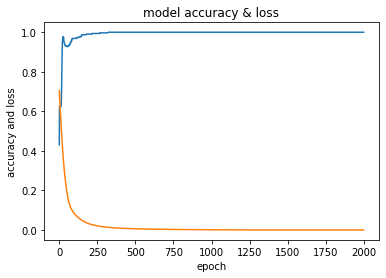

In [ ]:
#Visualize the models loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title( 'model accuracy & loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')


 

In [ ]:
print('shape of training data:', X_train.shape)
print('shape of test data:',X_test.shape)

shape of training data: (320, 24)
shape of test data: (80, 24)


In [ ]:
pred =model.predict(X)
pred =[1 if y>=0.5 else 0 for y in pred]
pred 

print('Original : {0}'.format(", ".join(str(x) for x in y)))
print('Predicted : {0}'.format(", ".join(str(x) for x in pred)))

13/13 [==============================] - 0s 2ms/step
Original : 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
print(type(pred))

<class 'list'>


In [ ]:
#pred
X['New_classification']=pred

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer